In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
from wordcloud import WordCloud, STOPWORDS


path=r"C:\Users\Metin\Desktop\Data Science - Jupyter\britishairlines_internship\data\BA_reviews_sentiment1.csv"

df=pd.read_csv(path)

df.head()

,Unnamed: 0,Unnamed: 0.1,Review,Aircraft,Travel Type,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommendation,sentinment
0,0,0,Organised boarding process. Really friendly cr...,A320,Business,Economy Class,January 2023,5,5,4,5,5,yes,"[{'label': 'POSITIVE', 'score': 0.999815762042..."
1,1,1,Outward journey BA245 London to Buenos Aires C...,A320,Couple Leisure,Premium Economy,January 2023,3,1,1,4,1,no,"[{'label': 'NEGATIVE', 'score': 0.998686015605..."
2,2,2,Check in agent at LHR was very helpful and fri...,Boeing 777-300,Solo Leisure,Premium Economy,January 2023,4,4,1,4,1,no,"[{'label': 'NEGATIVE', 'score': 0.999347984790..."
3,3,3,y disappointing. I book BA so I can fly during...,Boeing 777-300,Solo Leisure,Economy Class,January 2023,1,2,1,4,3,no,"[{'label': 'NEGATIVE', 'score': 0.999586164951..."
4,4,4,Excellent service both on the ground and on bo...,A380,Solo Leisure,First Class,January 2023,4,5,4,5,4,yes,"[{'label': 'POSITIVE', 'score': 0.999736011028..."


In [20]:
df["sentinment"] = np.where(df["sentinment"].str.contains("POSITIVE"), "Positive", "Negative")


In [21]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [22]:
df['Review'] = df['Review'].map(lambda x: x.lstrip('✅ Trip Verified | '))
df['Review'] = df['Review'].map(lambda x: x.lstrip('Not Verified | '))

In [23]:
df.head()

,Review,Aircraft,Travel Type,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommendation,sentinment
0,Organised boarding process. Really friendly cr...,A320,Business,Economy Class,January 2023,5,5,4,5,5,yes,Positive
1,Outward journey BA245 London to Buenos Aires C...,A320,Couple Leisure,Premium Economy,January 2023,3,1,1,4,1,no,Negative
2,Check in agent at LHR was very helpful and fri...,Boeing 777-300,Solo Leisure,Premium Economy,January 2023,4,4,1,4,1,no,Negative
3,y disappointing. I book BA so I can fly during...,Boeing 777-300,Solo Leisure,Economy Class,January 2023,1,2,1,4,3,no,Negative
4,Excellent service both on the ground and on bo...,A380,Solo Leisure,First Class,January 2023,4,5,4,5,4,yes,Positive


In [24]:
df.to_csv("C:/Users/Metin/Desktop/Data Science - Jupyter/britishairlines_internship/data/BA_reviews_analysis.csv")

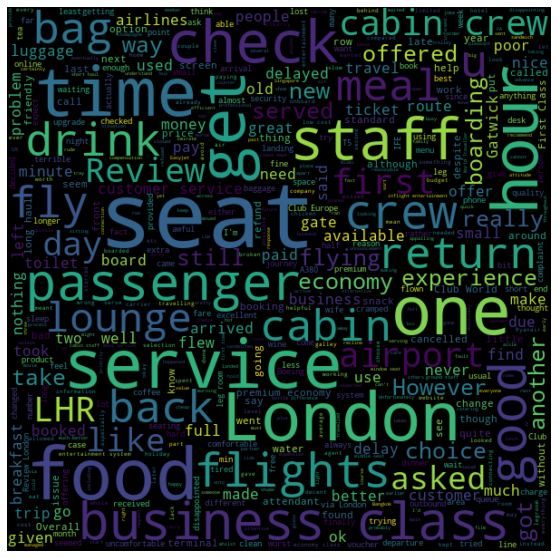

In [36]:
import nltk
from nltk.corpus import stopwords

# Start with one review:
reviews = " ".join(df[df["sentinment"]=="Negative"].Review)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would","airways"])
 
# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

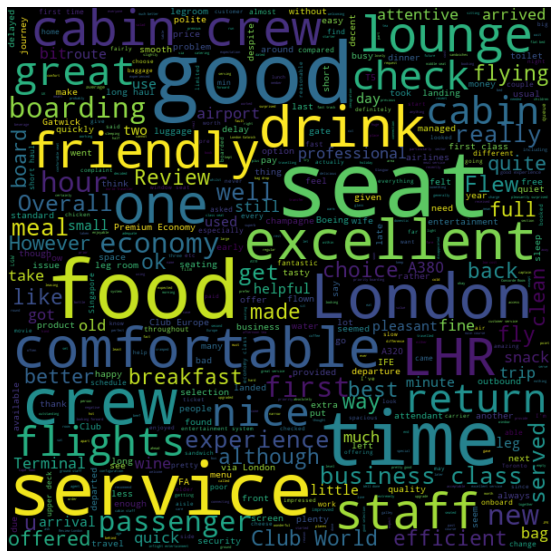

In [37]:
import nltk
from nltk.corpus import stopwords

# Start with one review:
reviews = " ".join(df[df["sentinment"]=="Positive"].Review)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would","airways"])
 
# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

reviews = " ".join(df.Review)
#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'I'),
  Text(1, 0, 'The'),
  Text(2, 0, 'BA'),
  Text(3, 0, '-'),
  Text(4, 0, 'British'),
  Text(5, 0, 'service'),
  Text(6, 0, 'seat'),
  Text(7, 0, 'London'),
  Text(8, 0, 'crew'),
  Text(9, 0, 'food'),
  Text(10, 0, ''),
  Text(11, 0, 'Airways'),
  Text(12, 0, 'seats'),
  Text(13, 0, 'good'),
  Text(14, 0, 'cabin'),
  Text(15, 0, 'time'),
  Text(16, 0, 'staff'),
  Text(17, 0, 'Heathrow'),
  Text(18, 0, 'class'),
  Text(19, 0, 'We')])

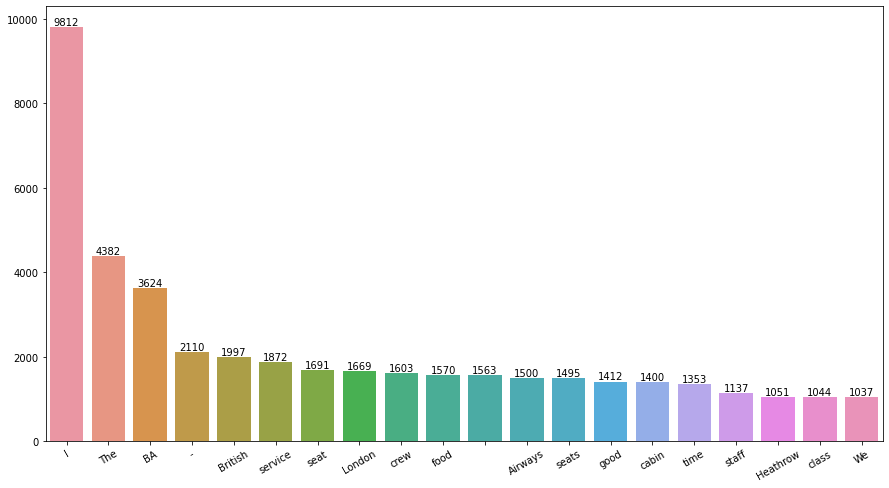

In [39]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<AxesSubplot:>

C:\Users\Metin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 10062 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Metin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 10062 missing from current font.
  font.set_text(s, 0, flags=flags)


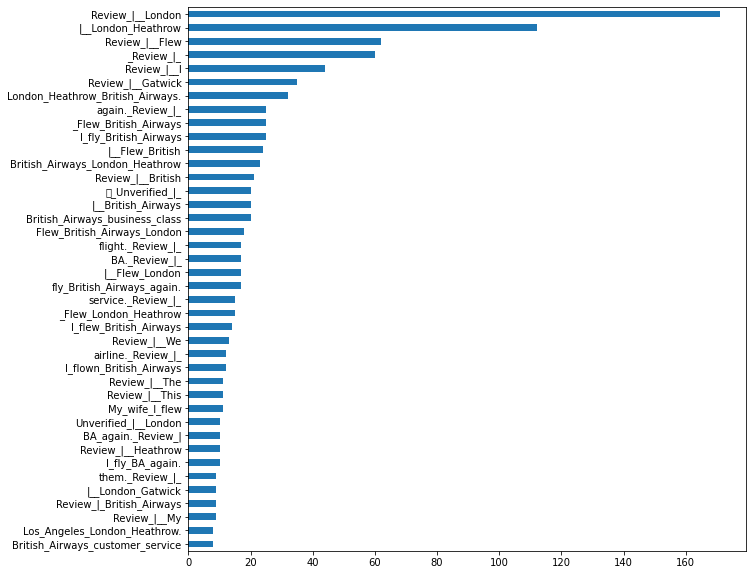

In [44]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from nltk import ngrams

reviews = " ".join(df.Review)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
   
    ## Generate bigrams
    ngram = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngram).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)